### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']= (15,7)
plt.rcParams['figure.dpi']= 150
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='viridis')
%matplotlib inline
import statistics

### Loading the Dataset

In [4]:
df = pd.read_csv("solarpowergeneration.csv")

In [5]:
df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [7]:
df.shape

(2920, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.2 KB


### EDA

In [9]:
 df[pd.isnull(df).any(axis=1)]

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
714,0.406143,57,12,2.8,2,4.0,96,NaN,30.16,159


In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64

In [12]:
df.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,0.503327,58.468996,24.957862,10.099486,1.987667,9.559609,73.505995,10.129154,30.017712,6982.182939
std,0.298069,6.842318,6.912203,4.837128,1.412220,1.380290,15.073974,7.261547,0.142006,10313.330078
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.232061,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.479241,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739559,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12725.000000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


In [13]:
df.nunique()

distance-to-solar-noon         2659
temperature                      37
wind-direction                   35
wind-speed                      159
sky-cover                         5
visibility                       17
humidity                         75
average-wind-speed-(period)      32
average-pressure-(period)        90
power-generated                1528
dtype: int64

In [14]:
df.duplicated().sum()

0

### Visualization

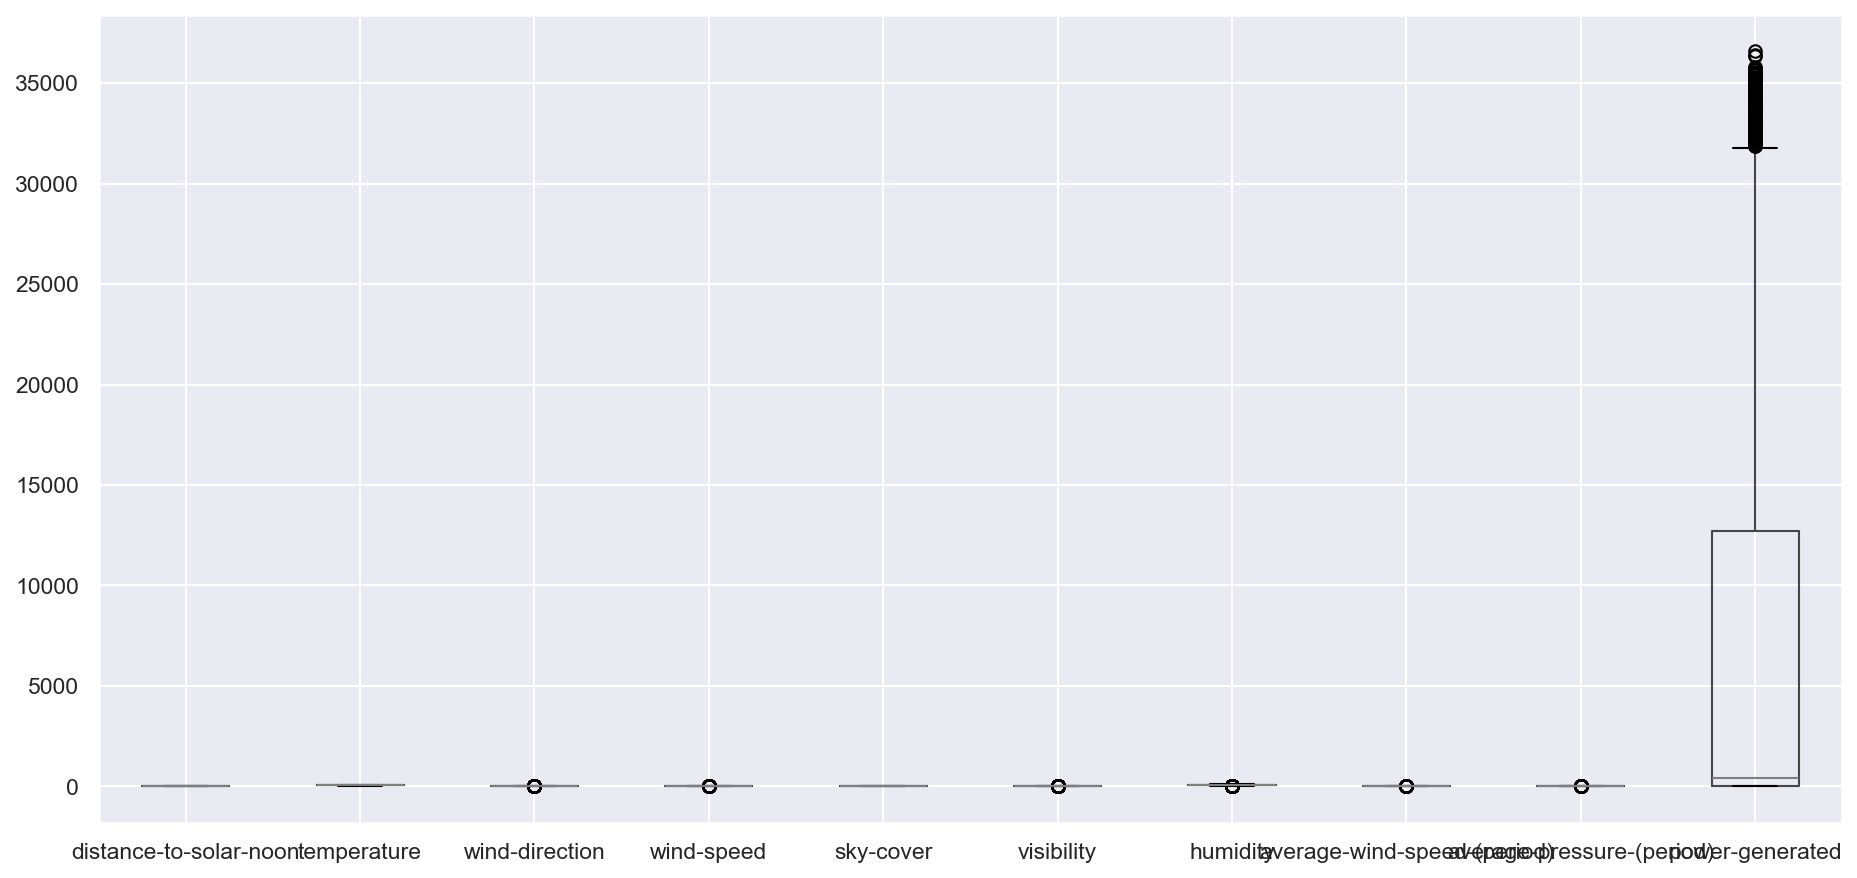

In [16]:
df.boxplot()
plt.show()

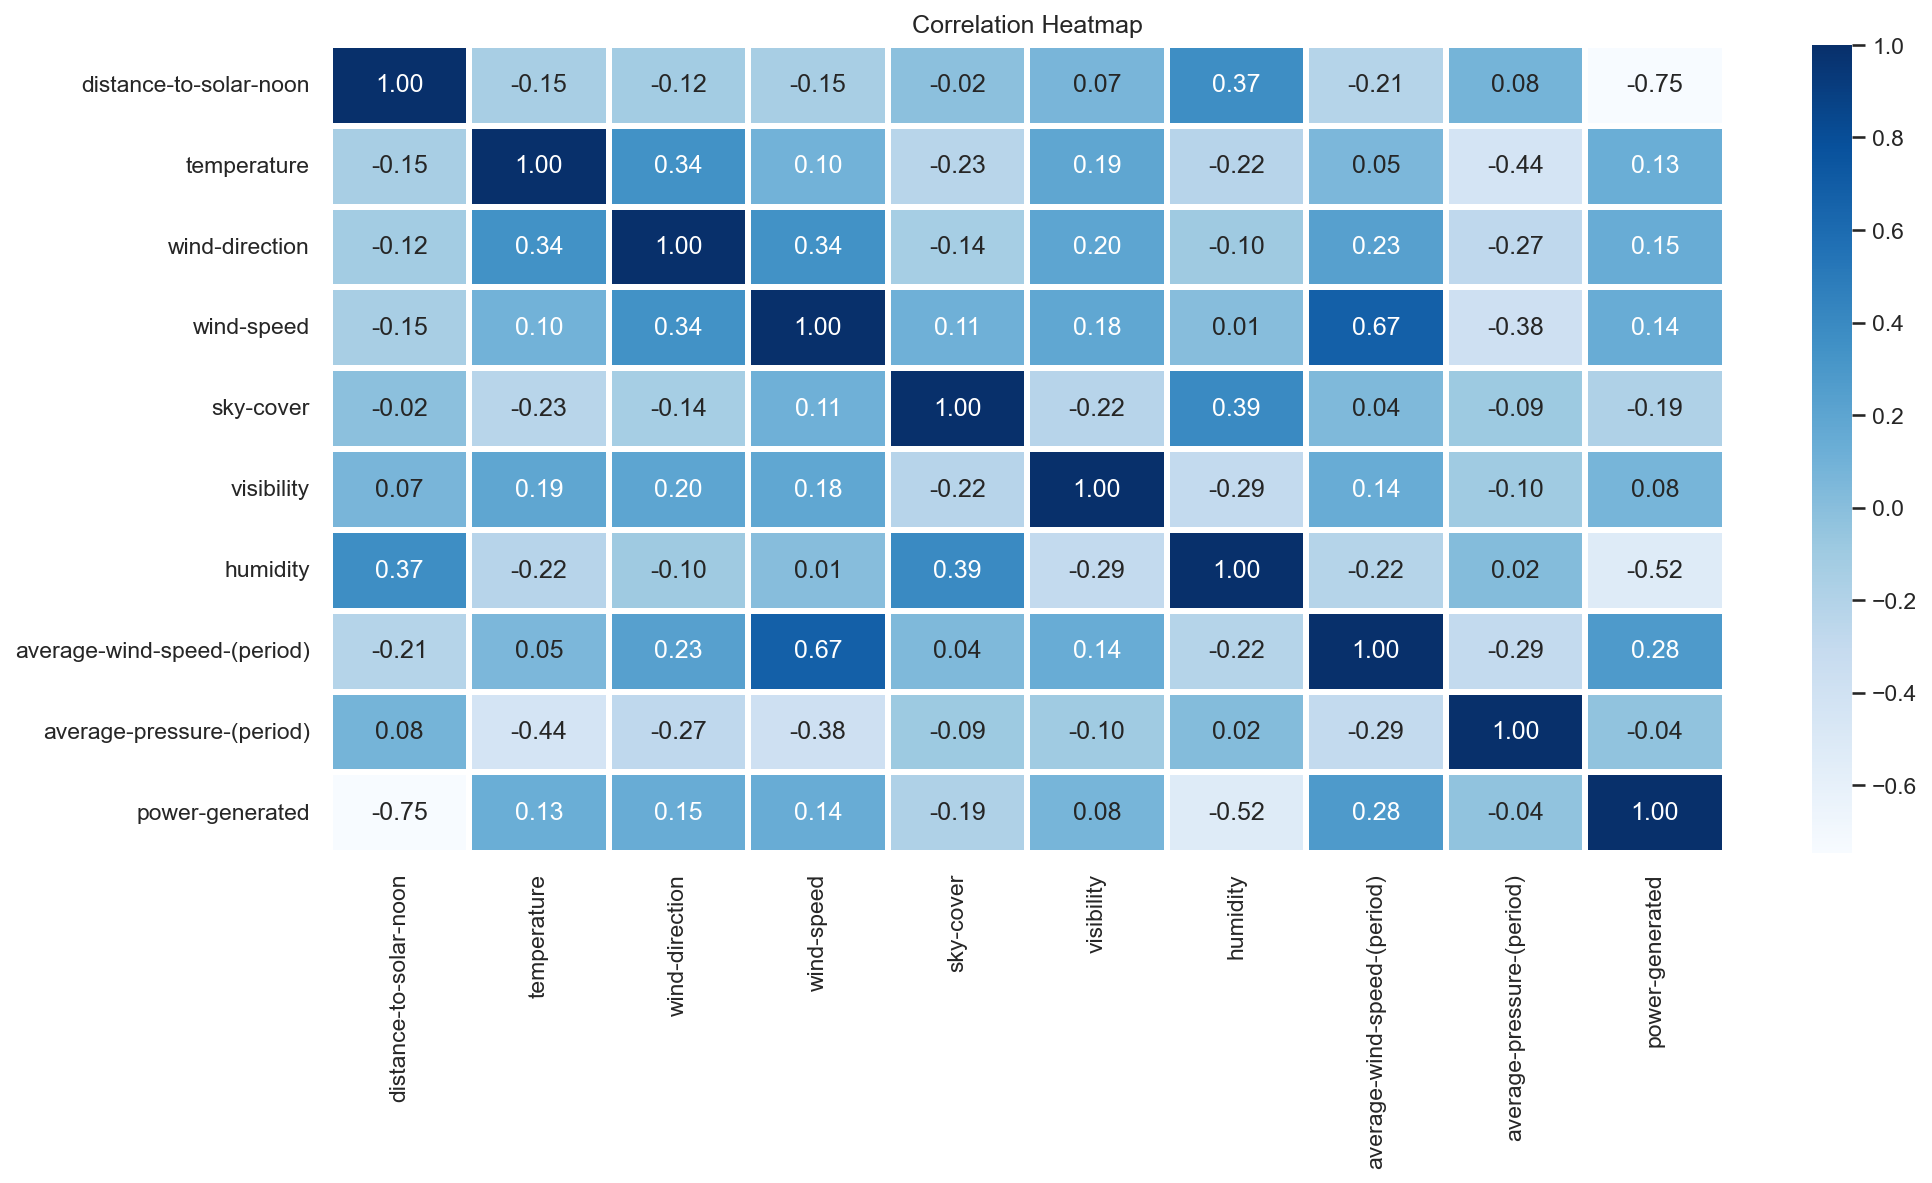

In [17]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

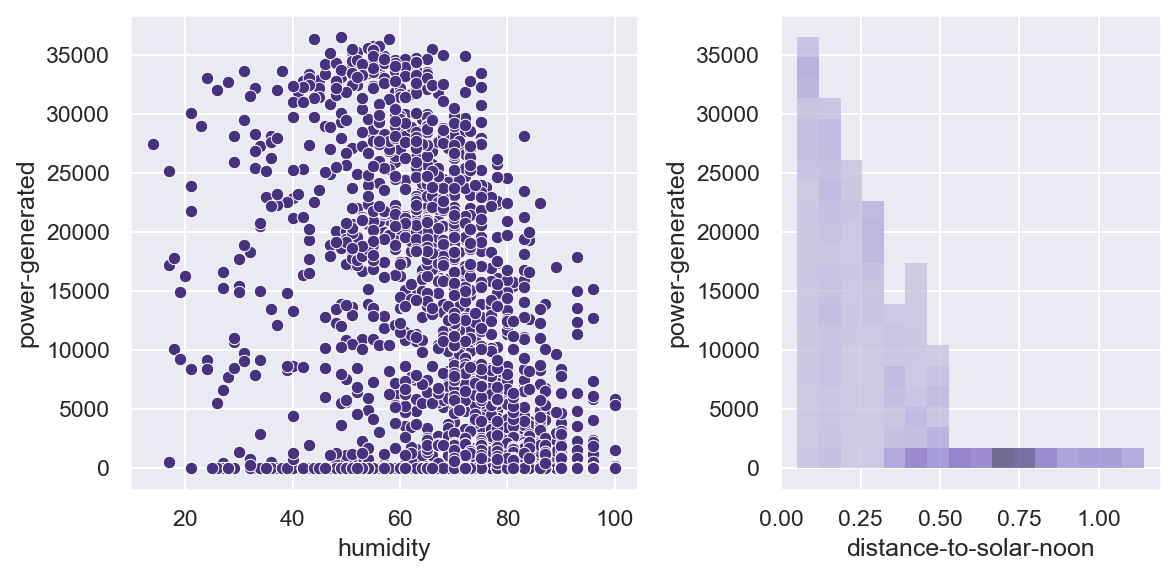

In [18]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=df, x='humidity', y='power-generated', ax=axs[0])
sns.histplot(data=df, x='distance-to-solar-noon', y='power-generated', shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

<Axes: xlabel='temperature', ylabel='power-generated'>

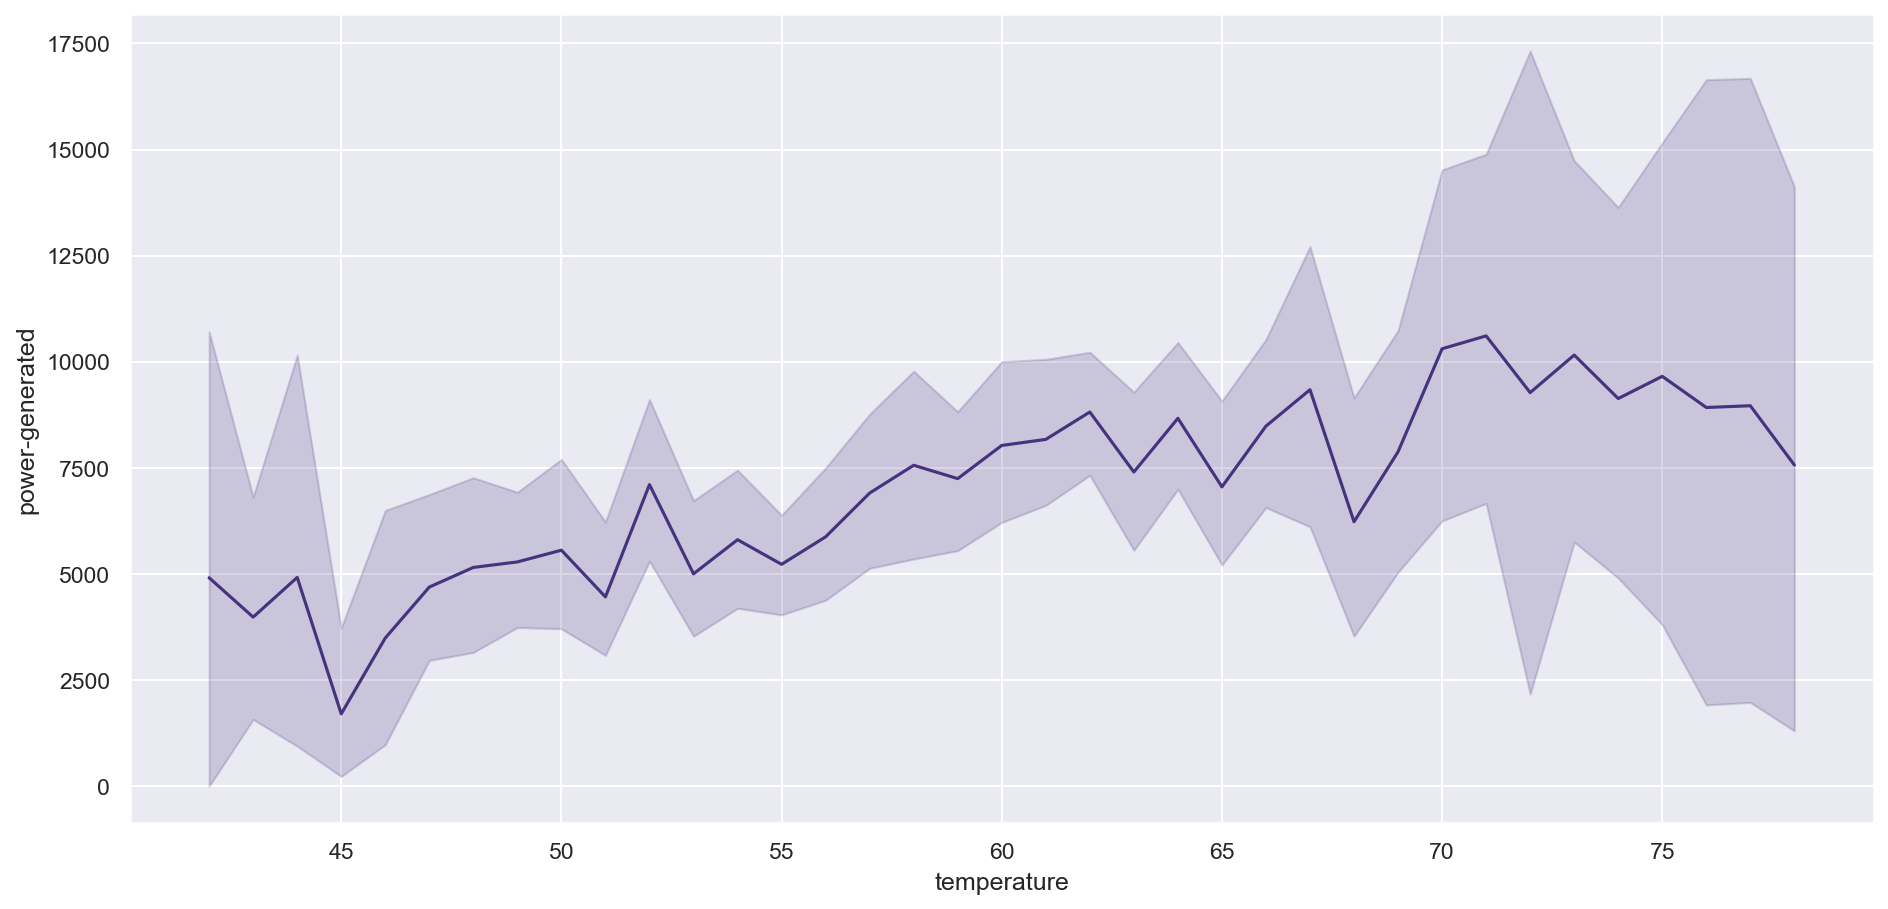

In [19]:
sns.lineplot(data=df, x='temperature', y='power-generated')

### Feature Engineering

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [25]:
df

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


### Model Building

In [28]:
# Split the data into features and target
X = df.drop(columns=['power-generated'])
y = df['power-generated']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
X

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period)
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89
...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87


In [32]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
y_pred_linear = linear_reg.predict(X_test_scaled)

# Evaluate the Linear Regression model
mse = mean_squared_error(y_test, y_pred_linear)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

print(f'Linear Regression - Mean Squared Error (MSE): {mse}')
print(f'Linear Regression - Root Mean Squared Error (RMSE): {rmse}')
print(f'Linear Regression - Mean Absolute Error (MAE): {mae}')
print(f'Linear Regression - R-squared (R²): {r2}')

Linear Regression - Mean Squared Error (MSE): 41479616.990554035
Linear Regression - Root Mean Squared Error (RMSE): 6440.46714070913
Linear Regression - Mean Absolute Error (MAE): 5099.810800872386
Linear Regression - R-squared (R²): 0.6229659955805864


In [34]:
# Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_scaled, y_train)
y_pred_tree = tree_reg.predict(X_test_scaled)

# Evaluate the Decision Tree Regression model
tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_rmse = np.sqrt(tree_mse)
tree_mae = mean_absolute_error(y_test, y_pred_tree)
tree_r2 = r2_score(y_test, y_pred_tree)

print(f'Decision Tree Regression - Mean Squared Error (MSE): {tree_mse}')
print(f'Decision Tree Regression - Root Mean Squared Error (RMSE): {tree_rmse}')
print(f'Decision Tree Regression - Mean Absolute Error (MAE): {tree_mae}')
print(f'Decision Tree Regression - R-squared (R²): {tree_r2}')

Decision Tree Regression - Mean Squared Error (MSE): 20826475.395547945
Decision Tree Regression - Root Mean Squared Error (RMSE): 4563.603334597338
Decision Tree Regression - Mean Absolute Error (MAE): 1880.8955479452054
Decision Tree Regression - R-squared (R²): 0.8106952284994821


In [36]:
# Random Forest Regressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train_scaled, y_train)
y_pred_forest = forest_reg.predict(X_test_scaled)

# Evaluate the Random Forest Regression model
forest_mse = mean_squared_error(y_test, y_pred_forest)
forest_rmse = np.sqrt(forest_mse)
forest_mae = mean_absolute_error(y_test, y_pred_forest)
forest_r2 = r2_score(y_test, y_pred_forest)

print(f'Random Forest Regression - Mean Squared Error (MSE): {forest_mse}')
print(f'Random Forest Regression - Root Mean Squared Error (RMSE): {forest_rmse}')
print(f'Random Forest Regression - Mean Absolute Error (MAE): {forest_mae}')
print(f'Random Forest Regression - R-squared (R²): {forest_r2}')

Random Forest Regression - Mean Squared Error (MSE): 10773030.788310274
Random Forest Regression - Root Mean Squared Error (RMSE): 3282.2295453411352
Random Forest Regression - Mean Absolute Error (MAE): 1531.69198630137
Random Forest Regression - R-squared (R²): 0.902077231359797


In [37]:
# Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train_scaled, y_train)
y_pred_gb = gb_reg.predict(X_test_scaled)

# Evaluate the Gradient Boosting Regression model
gbr_mse = mean_squared_error(y_test, y_pred_gb)
gbr_rmse = np.sqrt(gbr_mse)
gbr_mae = mean_absolute_error(y_test, y_pred_gb)
gbr_r2 = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting Regression - Mean Squared Error (MSE): {gbr_mse}')
print(f'Gradient Boosting Regression - Root Mean Squared Error (RMSE): {gbr_rmse}')
print(f'Gradient Boosting Regression - Mean Absolute Error (MAE): {gbr_mae}')
print(f'Gradient Boosting Regression - R-squared (R²): {gbr_r2}')

Gradient Boosting Regression - Mean Squared Error (MSE): 8897941.408192093
Gradient Boosting Regression - Root Mean Squared Error (RMSE): 2982.941737311021
Gradient Boosting Regression - Mean Absolute Error (MAE): 1634.57343388513
Gradient Boosting Regression - R-squared (R²): 0.9191210834713358


* We are getting good accuracy for Gradient Boosting Regression, so we are considering it.

### Deployment

In [41]:
from sklearn.ensemble import GradientBoostingRegressor
import pickle

model = GradientBoostingRegressor()
model.fit(X_train, y_train)  # Train the model

# Save the trained model
with open("gradient_boosting_model.pkl", "wb") as file:
    pickle.dump(model, file)